# Construct Dataset

In [3]:
import pycbc.noise
import pycbc.psd
import pycbc.filter
import pylab
from pycbc.filter import sigma
from pycbc.waveform import get_td_waveform
from pycbc.types.timeseries import load_timeseries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.random import uniform, randint
from tqdm import tqdm
import seaborn as sns
from sklearn.model_selection import train_test_split

#import data functions
import sys
sys.path.insert(0, '../functions')
from ipynb.fs.defs.generate_data import gw, visualize, bol
from ipynb.fs.defs.mass_sampling import mass_sample

Trial 1 for regression! 
- mass sampled using mass_sampling_functions 
    - uniform over chirp mass and ita, while m1, m2 within 10-100
    - Uniform selection over chirp mass and ita since it is what the model is supposed to predict accurately
    - Thus we will have a better accuracy
    
- no noise added (pure signal)
- masses randomly generated (ranges for masses shown below)
    - unlike later trials of classifier, here we will make sure the whole waveform around 0.8 second length
- train and test generated in one batch. Then separate.

ipynb.fs.defs.mass_sampling:95: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
100%|██████████| 15100/15100 [00:00<00:00, 19706.80it/s]


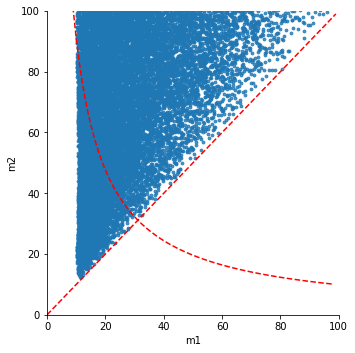

In [8]:
mass = mass_sample(15000)

# Create scatterplot of dataframe
sns.lmplot('m1', 'm2', data=mass, fit_reg=False, 
           scatter_kws={"s": 8})
plt.ylim(0,100)
plt.xlim(0,100)

plt.plot(np.arange(100),'r--')
plt.plot(1000/np.arange(1,100),'r--')
plt.show()

Unexpected finding: for length to be less than around 0.8, we have the range of masses constrained by the above 2 functions!

In [9]:
# Generate data of pure gw (snr = \infty) 
X = []
y = mass

for i in tqdm(range(len(mass))):
    gww = gw(mass.loc[i,'m1'], mass.loc[i,'m2'])
    X.append(np.asarray(gww))

100%|██████████| 15100/15100 [17:18<00:00, 16.27it/s]


In [10]:
# Save as dataframe
X_df = pd.DataFrame(X)

In [11]:
# Since sklearn makes things a lot easier, can just store the whole data and split every time. 
# If want to recreate the split just use same random seed
# write data into the same file under different keys

# '''ALREADY DONE NO NEED REPEAT
f_path = 'r_data_1A.h5'
X_df.to_hdf(f_path, key='X', mode='w')
y.to_hdf(f_path, key='y')
#'''